In [178]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib as mp
import joblib
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [179]:
df = pd.read_csv('/home/jcwiththelord/Downloads/healthcare_dataset.csv')
df = df.sample(frac=0.00181816, random_state=42)  # 100 columns of data
print(df)
print(df.head)
df = df.drop(columns=['Name','Hospital', 'Date of Admission'], axis=1)
df = df.dropna()
print(df.info())

                      Name  Age  Gender Blood Type Medical Condition  \
31641  mIchAEl thOrnTon mD   57    Male         O+          Diabetes   
9246    mattheW HUTcHiNsOn   51  Female         A+          Diabetes   
1583           RoNald paRK   20    Male         A+            Asthma   
36506          Jeff BroOkS   74  Female         B+           Obesity   
11259       TAnya THoMPsOn   56    Male        AB-           Obesity   
...                    ...  ...     ...        ...               ...   
24588          IAn JohNSoN   85    Male        AB-            Asthma   
30845   chRisTOPHEr LIttlE   51    Male         O+          Diabetes   
47721      cHArles DoUGLAS   62    Male         A+          Diabetes   
55073          cASEy sMith   26  Female         A-      Hypertension   
1390         STEve goODMAN   77  Female         O+            Asthma   

      Date of Admission            Doctor                         Hospital  \
31641        2023-09-15      Jason Hanson                

<Axes: xlabel='Medical Condition', ylabel='Age'>

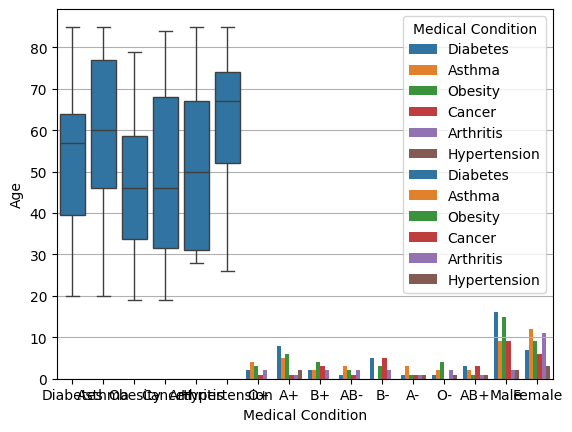

In [180]:
#analysis of the data i will be using 
df['Medical Condition'].value_counts
df['Blood Type'].value_counts
df['Age'].hist()

#Comparing my feature data to my target 
sns.boxplot(x='Medical Condition', y='Age', data=df)
sns.countplot(x='Blood Type', hue='Medical Condition', data=df)
sns.countplot(x='Gender', hue='Medical Condition', data=df)

In [181]:
x = df[['Age', 'Gender', 'Blood Type']]
y = df['Medical Condition']
x_encoded = pd.get_dummies(x, columns=['Gender', 'Blood Type'])
trained_feature_columns = X_encoded.columns.tolist()  


In [182]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [183]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.19047619047619047
Classification Report:
               precision    recall  f1-score   support

   Arthritis       0.00      0.00      0.00         2
      Asthma       0.33      0.67      0.44         3
      Cancer       0.00      0.00      0.00         3
    Diabetes       0.29      0.29      0.29         7
Hypertension       0.00      0.00      0.00         0
     Obesity       0.00      0.00      0.00         6

    accuracy                           0.19        21
   macro avg       0.10      0.16      0.12        21
weighted avg       0.14      0.19      0.16        21



/home/jcwiththelord/.var/app/com.vscodium.codium/data/python/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/jcwiththelord/.var/app/com.vscodium.codium/data/python/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/jcwiththelord/.var/app/com.vscodium.codium/data/python/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete